## ☂️ Seattle Rain Prediction

Given *data about weather in Seattle*, let's try to predict how much it will **rain** on a given day.

We will use a variety of regression models to make our predictions.

Data source: https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017

### Getting Started

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('archive/seattleWeather_1948-2017.csv')
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


### Preprocessing

In [5]:
df = data.copy()

In [6]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [7]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [8]:
# Drop missing rows
df = df.dropna(axis=0).reset_index(drop=True)

In [9]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25543,2017-12-10,0.00,49,34,False
25544,2017-12-11,0.00,49,29,False
25545,2017-12-12,0.00,46,32,False
25546,2017-12-13,0.00,48,34,False


In [11]:
# Convert RAIN column to numeric
df['RAIN'] = df['RAIN'].astype(int)

In [12]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25543,2017-12-10,0.00,49,34,0
25544,2017-12-11,0.00,49,29,0
25545,2017-12-12,0.00,46,32,0
25546,2017-12-13,0.00,48,34,0


In [14]:
# Extract Date features
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].apply(lambda x: x.year)
df['MONTH'] = df['DATE'].apply(lambda x: x.month)
df['DAY'] = df['DATE'].apply(lambda x: x.day)

In [15]:
df

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,1948-01-01,0.47,51,42,1,1948,1,1
1,1948-01-02,0.59,45,36,1,1948,1,2
2,1948-01-03,0.42,45,35,1,1948,1,3
3,1948-01-04,0.31,45,34,1,1948,1,4
4,1948-01-05,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...,...
25543,2017-12-10,0.00,49,34,0,2017,12,10
25544,2017-12-11,0.00,49,29,0,2017,12,11
25545,2017-12-12,0.00,46,32,0,2017,12,12
25546,2017-12-13,0.00,48,34,0,2017,12,13


In [16]:
df = df.drop('DATE', axis=1)

In [17]:
df

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...
25543,0.00,49,34,0,2017,12,10
25544,0.00,49,29,0,2017,12,11
25545,0.00,46,32,0,2017,12,12
25546,0.00,48,34,0,2017,12,13


### Predicting the PRCP column

In [18]:
# Split df into X and y
y = df['PRCP']
X = df.drop('PRCP', axis=1)

In [19]:
X

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,51,42,1,1948,1,1
1,45,36,1,1948,1,2
2,45,35,1,1948,1,3
3,45,34,1,1948,1,4
4,45,32,1,1948,1,5
...,...,...,...,...,...,...
25543,49,34,0,2017,12,10
25544,49,29,0,2017,12,11
25545,46,32,0,2017,12,12
25546,48,34,0,2017,12,13


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [21]:
X_train

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
3975,47,40,1,1958,11,19
25065,95,69,0,2016,8,19
5337,70,54,1,1962,8,12
14188,52,44,1,1986,11,5
13176,52,46,1,1984,1,28
...,...,...,...,...,...,...
10955,44,39,1,1977,12,29
17289,62,49,0,1995,5,3
5192,50,37,1,1962,3,20
12172,73,52,0,1981,4,29


In [22]:
y_train

3975     0.02
25065    0.00
5337     0.07
14188    0.57
13176    0.01
         ... 
10955    0.38
17289    0.00
5192     0.05
12172    0.00
235      0.11
Name: PRCP, Length: 17883, dtype: float64

In [23]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [24]:
X_train

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,-0.985028,-0.508563,1.150379,-1.220371,1.301661,0.373320
1,2.787580,2.757421,-0.869278,1.657357,0.430591,0.373320
2,0.822680,1.068119,1.150379,-1.021907,0.430591,-0.423973
3,-0.592048,-0.058083,1.150379,0.168877,1.301661,-1.221266
4,-0.592048,0.167157,1.150379,0.069645,-1.601906,1.398411
...,...,...,...,...,...,...
17878,-1.220816,-0.621184,1.150379,-0.277667,1.592018,1.512310
17879,0.193912,0.505018,-0.869278,0.615421,-0.440479,-1.449064
17880,-0.749240,-0.846424,1.150379,-1.021907,-1.021192,0.487219
17881,1.058468,0.842878,-0.869278,-0.079203,-0.730836,1.512310


In [25]:
X_train.var()

TMAX     1.000056
TMIN     1.000056
RAIN     1.000056
YEAR     1.000056
MONTH    1.000056
DAY      1.000056
dtype: float64

In [26]:
X_train.mean()

TMAX     9.883549e-17
TMIN     2.378012e-16
RAIN     6.853918e-17
YEAR     1.546800e-15
MONTH   -5.244738e-17
DAY      8.870361e-17
dtype: float64

In [28]:
models = {
    '                      LinearRegression': LinearRegression(),
    '      L2 Regularized Linear Regression': Ridge(),
    '                   K-Nearest Neighbors': KNeighborsRegressor(),
    '                         Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine (Linear Kernel)': LinearSVR(),
    '   Support Vector Machine (RBF Kernel)': SVR(),
    '                        Neural Network': MLPRegressor(),
    '                         Random Forest': RandomForestRegressor(),
    '                     Gradient Boosting': GradientBoostingRegressor(),
    '                               XGBoost': XGBRegressor(),
    '                              LightGBM': LGBMRegressor(),
    '                              CatBoost': CatBoostRegressor()
}

In [29]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                      LinearRegression trained.
      L2 Regularized Linear Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 17883, number of used features: 6
[LightGBM] [Info] Start training from score 0.105664
                              LightGBM trained.
Learning rate set to 0.064575
0:	learn: 0.2322349	total: 58.1ms	remaining: 58s
1:	learn: 0.2285481	total: 62.5ms	remaining: 31.2s
2:	learn: 0.2249404	total: 64.2ms	remaining: 21.3s
3:	learn: 0.2218586	total: 66.5ms	remaining: 16.5s
4:	learn: 0.2190831	total: 6

### Results

In [30]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

                      LinearRegression R^2: 0.27661
      L2 Regularized Linear Regression R^2: 0.27660
                   K-Nearest Neighbors R^2: 0.22815
                         Decision Tree R^2: -0.41149
Support Vector Machine (Linear Kernel) R^2: 0.16974
   Support Vector Machine (RBF Kernel) R^2: 0.27201
                        Neural Network R^2: 0.31609
                         Random Forest R^2: 0.24948
                     Gradient Boosting R^2: 0.33073
                               XGBoost R^2: 0.20782
                              LightGBM R^2: 0.32303
                              CatBoost R^2: 0.28960


### Predicting RAIN column

In [31]:
# Split df into X and y
y = df['RAIN']
X = df.drop('RAIN', axis=1)

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [33]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [34]:
X_train

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
0,-0.361781,-0.985028,-0.508563,-1.220371,1.301661,0.373320
1,-0.446246,2.787580,2.757421,1.657357,0.430591,0.373320
2,-0.150618,0.822680,1.068119,-1.021907,0.430591,-0.423973
3,1.961010,-0.592048,-0.058083,0.168877,1.301661,-1.221266
4,-0.404014,-0.592048,0.167157,0.069645,-1.601906,1.398411
...,...,...,...,...,...,...
17878,1.158591,-1.220816,-0.621184,-0.277667,1.592018,1.512310
17879,-0.446246,0.193912,0.505018,0.615421,-0.440479,-1.449064
17880,-0.235084,-0.749240,-0.846424,-1.021907,-1.021192,0.487219
17881,-0.446246,1.058468,0.842878,-0.079203,-0.730836,1.512310


In [35]:
y_train

3975     1
25065    0
5337     1
14188    1
13176    1
        ..
10955    1
17289    0
5192     1
12172    0
235      1
Name: RAIN, Length: 17883, dtype: int64

In [37]:
clf = LinearSVC()

clf.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(clf.score(X_test, y_test)*100))

Test Accuracy: 100.00%


### Examine correlations

In [38]:
# Split df into X and y
y = df['PRCP']
X = df.drop('PRCP', axis=1)

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [40]:
X_train

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
3975,47,40,1,1958,11,19
25065,95,69,0,2016,8,19
5337,70,54,1,1962,8,12
14188,52,44,1,1986,11,5
13176,52,46,1,1984,1,28
...,...,...,...,...,...,...
10955,44,39,1,1977,12,29
17289,62,49,0,1995,5,3
5192,50,37,1,1962,3,20
12172,73,52,0,1981,4,29


In [41]:
y_train

3975     0.02
25065    0.00
5337     0.07
14188    0.57
13176    0.01
         ... 
10955    0.38
17289    0.00
5192     0.05
12172    0.00
235      0.11
Name: PRCP, Length: 17883, dtype: float64

In [42]:
corr = pd.concat([X_train, y_train], axis=1).corr()

In [43]:
corr

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY,PRCP
TMAX,1.000000,0.860582,-0.389710,0.062575,0.155203,0.004787,-0.229904
TMIN,0.860582,1.000000,-0.138188,0.122744,0.222624,0.004888,-0.068346
RAIN,-0.389710,-0.138188,1.000000,-0.016502,-0.043894,-0.006046,0.513353
YEAR,0.062575,0.122744,-0.016502,1.000000,-0.001206,0.001029,-0.008457
MONTH,0.155203,0.222624,-0.043894,-0.001206,1.000000,0.018366,0.009781
DAY,0.004787,0.004888,-0.006046,0.001029,0.018366,1.000000,-0.005343
PRCP,-0.229904,-0.068346,0.513353,-0.008457,0.009781,-0.005343,1.000000


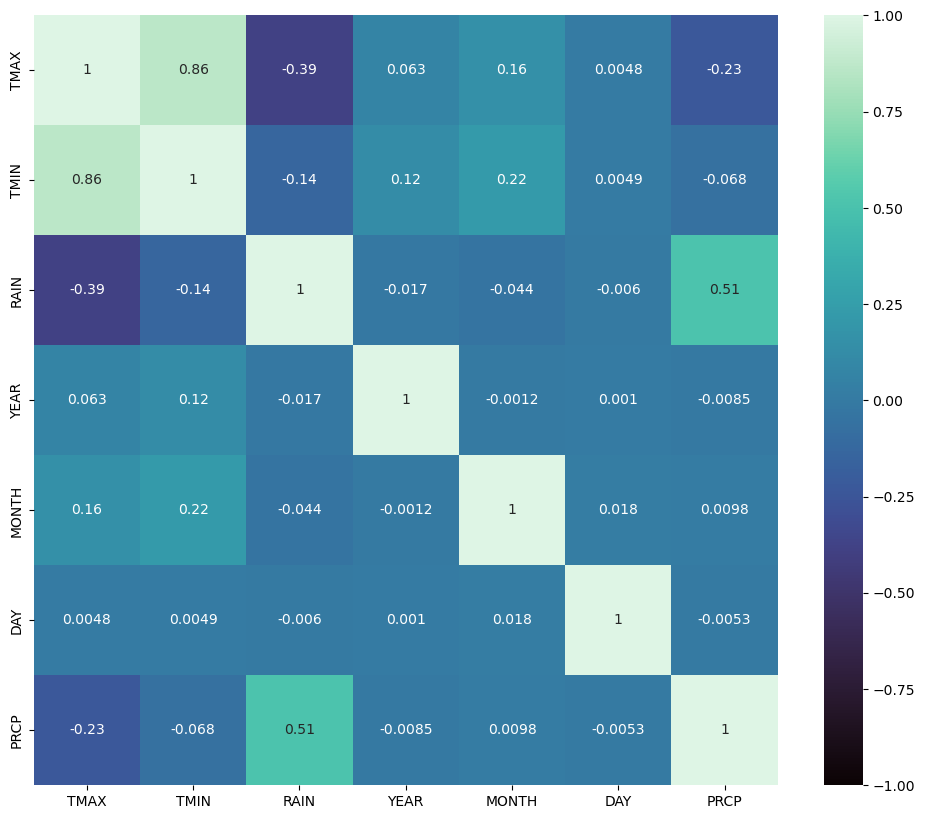

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

### Classifying using a simple function

In [51]:
np.array(X_test['RAIN'] > 0, dtype=int)

array([1, 0, 0, ..., 0, 1, 1], shape=(7665,))

In [52]:
y_pred = X_test['RAIN'] > 0
y_pred = np.array(y_pred, dtype=int)

In [53]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], shape=(7665,))

In [54]:
y_true = X_test['RAIN']

In [56]:
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred)*100))

Test Accuracy: 100.00%
